# Digit Recognisation using various classifiers

This is a mere exploration exercise aimed at getting more intuition about working of various algorithms and their hyper parameters.Improving the accuracy_score of a classifier to its maximum by altering the hyper parameters.

# Digit Recognisation using Logistic Regression Algorithm

This example follows same steps as discussed from Jake Vanderplas tutorial and done so only after thorough understanding of concepts involved.

- Importing digits dataset

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

- exploring the componants of digits dataset.

In [3]:
digits.data[0],'',digits.images[0],'',digits.data[1],'',digits.images[1]

(array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]),
 '',
 array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]),
 '',
 array([  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  1

In [4]:
digits.data.shape,digits.images.shape,digits.target.shape,digits.target_names.shape

((1797, 64), (1797, 8, 8), (1797,), (10,))

- Visualising the digit using plt.imshow command

(<matplotlib.image.AxesImage at 0x1cf3ae33128>,
 array([[  0.,   0.,   0.,  14.,   4.,   0.,   0.,   0.],
        [  0.,   0.,   6.,  13.,   1.,   0.,   0.,   0.],
        [  0.,   0.,  15.,   4.,   0.,   0.,   0.,   0.],
        [  0.,   4.,  16.,   7.,   4.,   2.,   0.,   0.],
        [  0.,   8.,  16.,  11.,   9.,  15.,   5.,   0.],
        [  0.,   5.,  14.,   1.,   0.,  10.,   9.,   0.],
        [  0.,   0.,  11.,  12.,   5.,  13.,   5.,   0.],
        [  0.,   0.,   1.,  13.,  16.,   9.,   0.,   0.]]))

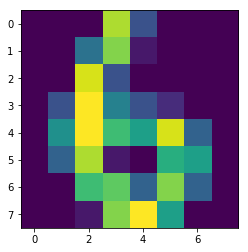

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow(digits.images[1497]),digits.images[1497]

Below code is explained as follows
- ax.flat flattens the numpy array so that it can be iterated
- enumerate as we already know will return the target label and the value together as tuples
- transform = ax.transAxes will push text values below.for more intuition run the transform command with and without.

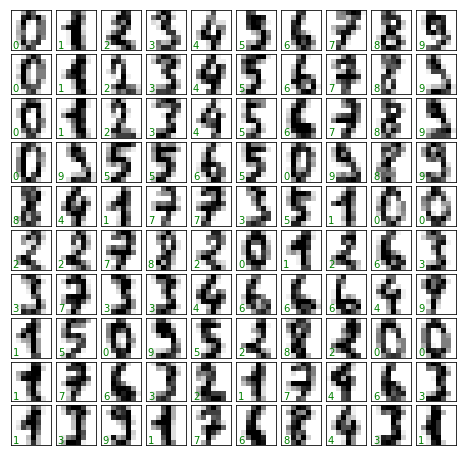

In [6]:
f,ax = plt.subplots(10,10,figsize = (8,8))
f.subplots_adjust(hspace = 0.1,wspace = 0.1)
for i,ax in enumerate(ax.flat):
    ax.imshow(digits.images[i],cmap = 'binary')
    ax.text(0.05,0.05,str(digits.target[i]),color = 'green',transform = ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])

This is a dimensionality reduction algorithm just like PCA but known as Isomap

PCA is used to reduce dimensions of a linear data and Isomap is used to reduce the dimensions of a non linear data.In PCA the relation between features is given by a linear equation an in Isomap this relation is given by a polynomial or higher order equations.

In [7]:
from sklearn.manifold import Isomap

In [8]:
model = Isomap(n_jobs=-1,n_components=2)
data_red = model.fit_transform(digits.data)
data_red.shape

(1797, 2)

Visualising the Coordinates of digits.images

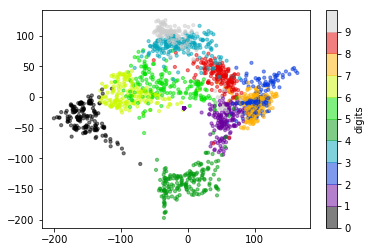

In [9]:
plt.scatter(data_red[:,0],data_red[:,1],c = digits.target,alpha = 0.5,s = 10,cmap = plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar(label = 'digits',ticks = range(10))
plt.clim(0,10)

In [10]:
from sklearn.cross_validation import train_test_split as tts

C:\Users\user\anaconda_new\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X_train,X_test,y_train,y_test = tts(digits.data,digits.target,random_state = 3)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [13]:
from sklearn.linear_model import LogisticRegression as lr

In [14]:
model = lr()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(X_test)

Evaluating our model

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
delta = confusion_matrix(y_test,y_pred)

C:\Users\user\anaconda_new\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


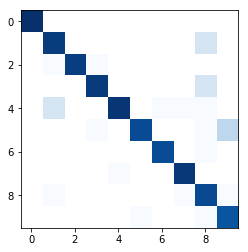

In [18]:
import numpy as np
plt.imshow(np.log(delta),cmap = 'Blues',interpolation = 'nearest')

Applying Log function to the confusion matrix is only to capture the minute variations in data

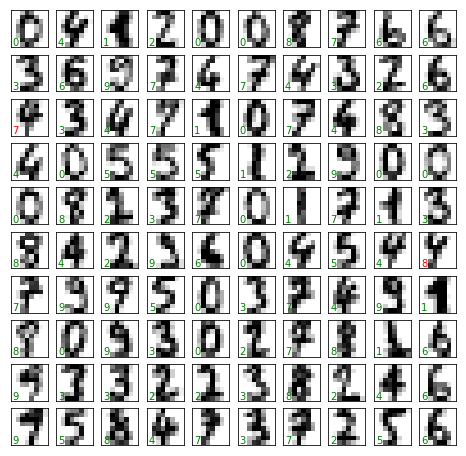

In [19]:
f,ax = plt.subplots(10,10,figsize = (8,8))

for i,ax in enumerate(ax.flat):
    ax.imshow(X_test[i].reshape(8,8),cmap = 'binary')
    ax.text(0.05,0.05,y_pred[i],color = 'green' if (y_pred[i] == y_test[i]) else 'red',transform = ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])

# Digit recognisation using Support Vector Machines

In [31]:
digits.data[0],digits.images[0],digits.target[0],digits.target_names[0]

(array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]),
 array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]),
 0,
 0)

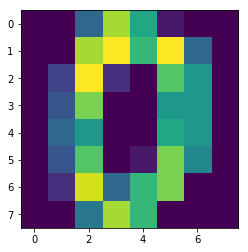

In [26]:
plt.imshow(digits.images[0])

In [106]:
data = digits.data

In [36]:
labels = digits.target

In [38]:
from sklearn.cross_validation import train_test_split
X1,X2,y1,y2 = train_test_split(digits.data,digits.target)

Kernel by default is 'radial basis function' but that cannot be applied to the digits dataset because rbf overfits the data I guess.linear kernel is sufficient as the SVC under the hood uses one vs one method,linear kernel divides the data satisfactorily.

In [99]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')

In [100]:
model.fit(X1,y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
y_pred = model.predict(X2)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [103]:
accuracy_score(y2,y_pred)

0.97111111111111115

In [104]:
confusion_matrix(y2,y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 44,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 30,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 30]])

C:\Users\user\anaconda_new\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


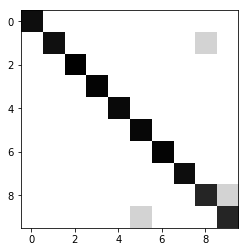

In [105]:
plt.imshow(np.log(confusion_matrix(y_pred,y2)),interpolation = 'nearest',cmap = 'binary')

In [108]:
model.predict(data[1647]),labels[1647]

C:\Users\user\anaconda_new\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([6]), 6)

# KMeans Clustering Algorithm

In [234]:
from sklearn.cluster import KMeans
#KMeans?

In [252]:
model = KMeans(n_clusters = 10,random_state= 5,n_init = 100,n_jobs = -1,max_iter = 3000)

In [253]:
model.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
    n_clusters=10, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [254]:
k_pred = model.predict(digits.data[1600:])

In [255]:
accuracy_score(k_pred,digits.target[1600:])

0.15736040609137056

No matter how many changes you make on KMeans Clustering algorithm it wont be able to give you the best accuracy score.because KMeans follows clustering without labels.It wont be able to group numbers based on their features but nearness to one another.

# Decision Tree Classifier

Decision tree classifer is the basic tree model.It has high computational advantages but the problem with this is it easily overfits the data.

In [257]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [341]:
model = DTC(random_state = 1,max_features = 60,max_depth = 8)

In [342]:
model.fit(X1,y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=60, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [343]:
y_pred = model.predict(X2)

In [344]:
accuracy_score(y2,y_pred)

0.86888888888888893

Look at the jump in accuracy_score when Kmeans is used and decision tree is used.

C:\Users\user\anaconda_new\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


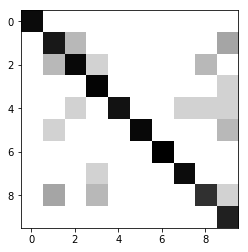

In [345]:
plt.imshow(np.log(confusion_matrix(y2,y_pred)),cmap = 'binary')

# Random Forests Classifier

Decison tree classifier works well but for the subsets of same data it could produce multiple results.one method to overcome it is averaging out all the subsets to get a better prediction model.This resulting better model is called as Random forest classifier.

In [424]:
from sklearn.ensemble import RandomForestClassifier
#model?

In [421]:
model = RandomForestClassifier(random_state = 3,max_depth = 14,n_estimators = 1000)

In [422]:
model.fit(X1,y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

In [423]:
y_pred = model.predict(X2)
accuracy_score(y2,y_pred)

0.98222222222222222

C:\Users\user\anaconda_new\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


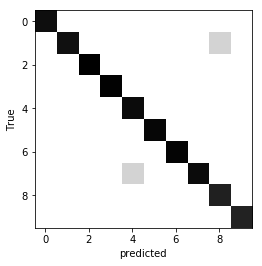

In [436]:
plt.imshow(np.log(confusion_matrix(y_pred,y2)),cmap = 'binary',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('predicted')